# Week 6-2 영어 리뷰 단어 분포 살펴보기

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r'C:\Users\Administrator\Downloads\6주차_11일차,12일차_자연어처리\Week6 자연어처리 Data')
review_df=pd.read_csv("thinq_e_review.csv")


In [7]:
review_df

,date,star,like,comment
0,"September 18, 2021",1,12.0,This app no longer works. It has just updated ...
1,"September 19, 2021",1,NaN,Everything worked fine until a week or so ago....
2,"September 18, 2021",2,6.0,App doesn't work with wired TV connection. EDI...
3,"September 18, 2021",1,2.0,I'm trying this again by have Alexa connection...
4,"September 1, 2021",1,104.0,"Just embarrassing. Absolutely, 100%, will not ..."
...,...,...,...,...
11275,"June 6, 2019",5,NaN,Good app. useful so far
11276,"November 9, 2020",5,NaN,Its been helpful. Hope it stays that way
11277,"July 17, 2020",5,NaN,Worked like it should and gave me feedback tha...
11278,"September 27, 2020",1,NaN,error routed device.. .


In [8]:
review_df.loc[0,"comment"].split(' ')

['This',
 'app',
 'no',
 'longer',
 'works.',
 'It',
 'has',
 'just',
 'updated',
 'and',
 'tells',
 'me',
 'my',
 'login',
 'is',
 'incorrect,',
 'not',
 'only',
 'that,',
 'after',
 'about',
 'three',
 'attempts',
 'it',
 'tells',
 'me',
 'my',
 'account',
 'has',
 'had',
 'too',
 'many',
 'login',
 'attempts',
 'and',
 'sends',
 'me',
 'an',
 'email',
 'to',
 'verify',
 'the',
 'account.',
 'Logging',
 'in',
 'on',
 'their',
 'website',
 'works',
 'fine.',
 'They',
 'released',
 'this',
 'update',
 'yesterday',
 '...\nFull',
 'Review']

In [26]:
#word count
word_counts = review_df['comment'].apply(lambda x:len(x.split(' ')))

In [27]:
word_counts.head()

0    57
1    59
2    56
3    58
4    57
Name: comment, dtype: int64

In [28]:
word_counts.describe()

count    11280.000000
mean        26.573670
std         18.052904
min          2.000000
25%         11.000000
50%         21.000000
75%         40.000000
max         71.000000
Name: comment, dtype: float64

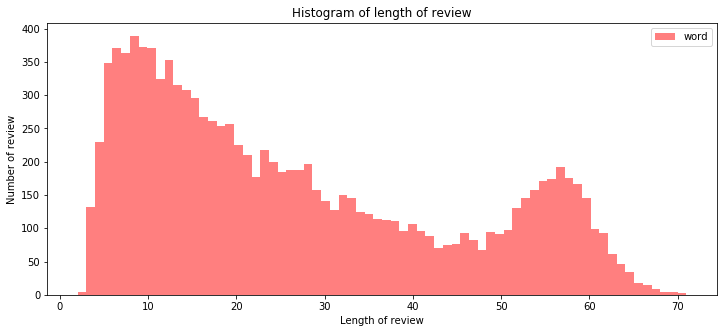

In [29]:
# word count 히스토그램 그리기
plt.figure(figsize=(12, 5))
plt.hist(word_counts, bins=70, alpha=0.5, color= 'r', label='word')
plt.legend()
# 그래프 제목
plt.title('Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')
plt.show()

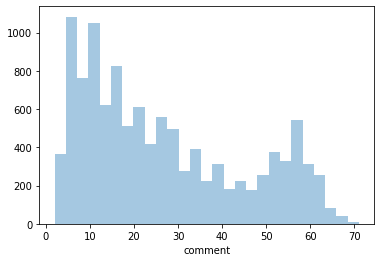

In [30]:
# sns에서 히스토그램 그리기

sns.distplot(word_counts,kde=False)
#sns.distplot(word_counts)

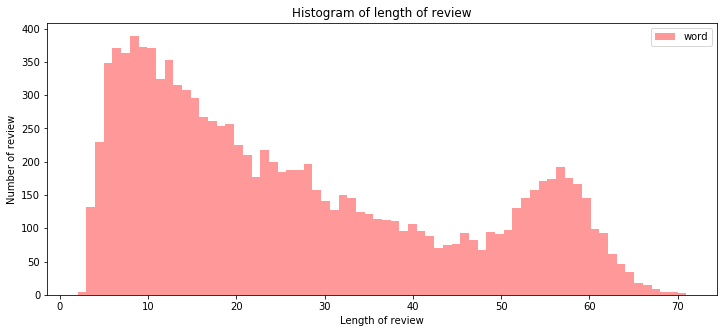

In [31]:
plt.figure(figsize=(12, 5))
ax = sns.distplot(word_counts,kde=False,bins=70,color='r')
ax.set_xlabel('Length of review')
ax.set_ylabel('Number of review')
ax.set_title('Histogram of length of review')
ax.legend(labels=['word'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2abb4d11b08>,
 'caps': [<matplotlib.lines.Line2D at 0x2abb4d15ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2abb4d11108>],
 'medians': [<matplotlib.lines.Line2D at 0x2abb4d1ba48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2abb4d1f9c8>],
 'means': [<matplotlib.lines.Line2D at 0x2abb4d1bb48>]}

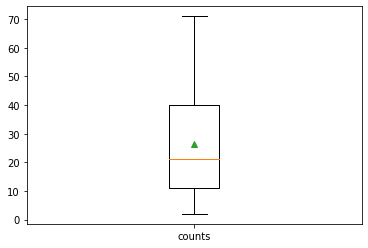

In [32]:
# 박스 플랏
plt.boxplot(word_counts,
             labels=['counts'],
             showmeans=True)

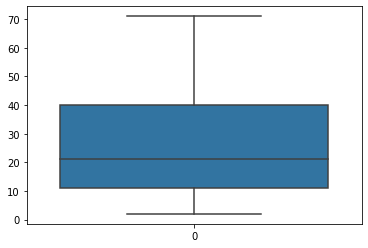

In [33]:
sns.boxplot(data=word_counts)

In [34]:
print(review_df.loc[0,"comment"])
print(review_df.loc[1,"comment"])

This app no longer works. It has just updated and tells me my login is incorrect, not only that, after about three attempts it tells me my account has had too many login attempts and sends me an email to verify the account. Logging in on their website works fine. They released this update yesterday ...
Full Review
Everything worked fine until a week or so ago. Now it will not connect to my oven anymore. Tried starting over and it says it may not work with a 5ghz network, try setting your router to 2.4ghz and try again. Um. No. Everything was just working fine, I have not changed my router settings, and I'm no...
Full Review


In [35]:
' '.join(review_df.loc[:1,"comment"])

"This app no longer works. It has just updated and tells me my login is incorrect, not only that, after about three attempts it tells me my account has had too many login attempts and sends me an email to verify the account. Logging in on their website works fine. They released this update yesterday ...\nFull Review Everything worked fine until a week or so ago. Now it will not connect to my oven anymore. Tried starting over and it says it may not work with a 5ghz network, try setting your router to 2.4ghz and try again. Um. No. Everything was just working fine, I have not changed my router settings, and I'm no...\nFull Review"

(-0.5, 799.5, 599.5, -0.5)

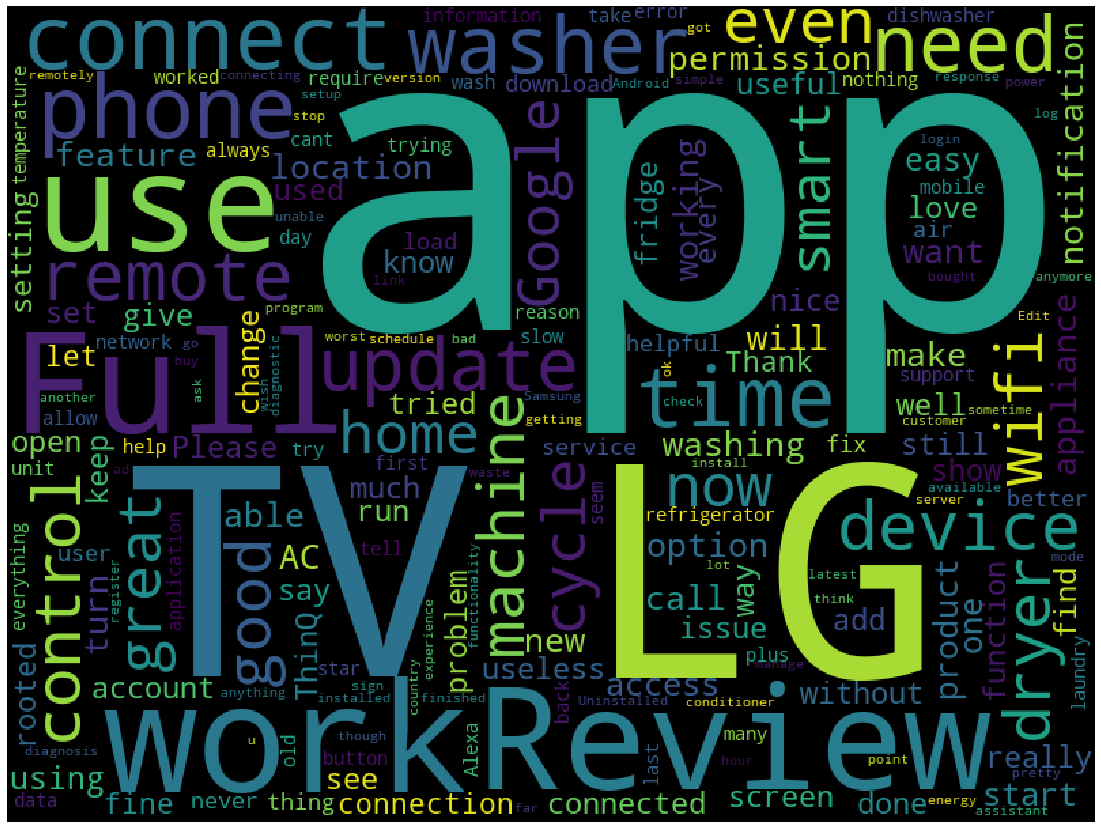

In [36]:
# 워드 클라우드 그리기
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600, collocations = False).generate(" ".join(review_df['comment']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

1    5318
2    1164
3    1127
4    1112
5    2559
Name: star, dtype: int64


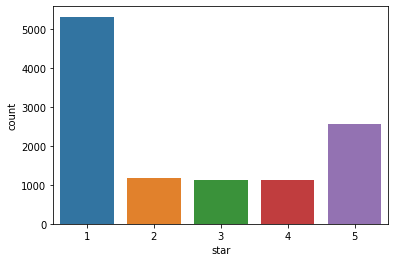

In [37]:
# 평점 분포
print(review_df['star'].value_counts().sort_index())
sns.countplot(review_df['star'],order=review_df['star'].value_counts().sort_index().index)

In [38]:
review_df['star'].mean()

2.506205673758865